In [38]:

from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from torch.utils.data.dataloader import DataLoader
import torch
import ssapp.Utils as Utils
torch.manual_seed(42)
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
%load_ext autoreload
%autoreload 2

from ssapp.data.AntennaDatasetLoaders import PatchAntennaDataset
from ssapp.models.NeuralNetworkModels.Autoencoders import PatchAntenna1ConvAutoEncoder, ConvAutoEncoderAndLatentRegressor
from ssapp.models.HelperFunctions import loadModel
from ssapp.data.AntennaDatasetLoaders import load_serialized_dataset

fig_save_dir = Path().cwd().parents[1] / 'reports' / 'figures'

BATCH_SIZE = 1
dataset = load_serialized_dataset('CircularHornDataset1')
train_data, test_data = Utils.train_test_data_split(dataset, TRAIN_TEST_RATIO = 0.7)

params, fields  = next(iter(DataLoader(dataset,batch_size=len(dataset))))




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


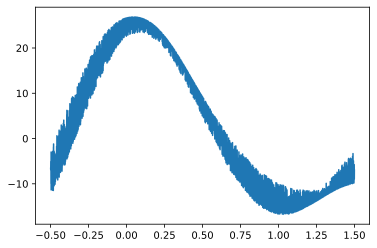

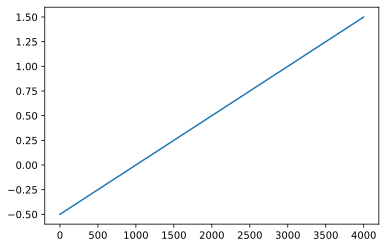

In [39]:

from matplotlib import pyplot as plt

i = 0
plt.figure()
sorted_param_idx = sorted(range(len(params)), key=lambda k: params[k,i])
plt.plot(params[sorted_param_idx,i],fields[sorted_param_idx,180,0,0])




plt.figure()
plt.plot(params[sorted_param_idx,i])

(4000,)
(2, 4000, 4000)


ValueError: Argument Z must be 2-dimensional.

<Figure size 432x288 with 0 Axes>

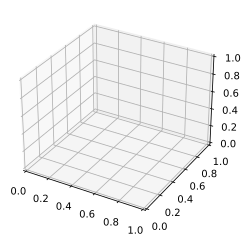

In [49]:
plt.figure()
sorted_param_idx1,sorted_param_idx2 = (sorted(range(len(params)), key=lambda k: params[k,0]),sorted(range(len(params)), key=lambda k: params[k,1]))

mag = lambda a,b: 20*np.log10(a**2+b**2)

N = 20

x = params[sorted_param_idx1[0:N],0]
y = params[sorted_param_idx2[0:N],1]

X, Y = np.meshgrid(x,y)

print(fields[sorted_param_idx1,180,0,0].numpy().flatten().shape)

Z= np.meshgrid(fields[sorted_param_idx1,180,0,0].numpy().flatten(),fields[sorted_param_idx2,180,0,0].numpy().flatten())
Z = np.array(Z)
print(Z.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('plasma'),
linewidth=0, alpha=1)

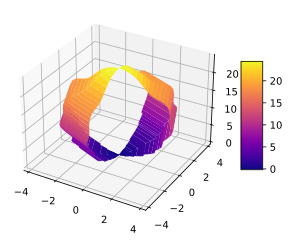

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

theta, phi = np.linspace(0, np.pi/2, 3), np.linspace(-np.pi, np.pi, 361)
THETA, PHI = np.meshgrid(theta, phi)
R = 20*(np.log10((np.sqrt(fields[1,:,0:1,0]**2+fields[1,:,0:1,1]**2)+1)))
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('plasma'),
    linewidth=0, antialiased=False, alpha=1)
fig.colorbar(plot, shrink=0.5, aspect=5)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go 
from scipy.interpolate import griddata


# Plotly 3D Surface
fig = go.Figure(go.Surface(x=X,y=Y,z=Z,
                       colorscale='plasma'
                 ))
fig.update_layout(
    autosize=False,
    width=600,
    height=600)
fig.show()